In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
test = pd.read_csv(r'/content/fraudTest.csv')
train = pd.read_csv(r'/content/fraudTrain.csv')

In [4]:
df = pd.concat([train, test], ignore_index=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23403 entries, 0 to 23402
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23403 non-null  int64  
 1   trans_date_trans_time  23403 non-null  object 
 2   cc_num                 23403 non-null  int64  
 3   merchant               23403 non-null  object 
 4   category               23403 non-null  object 
 5   amt                    23403 non-null  float64
 6   first                  23403 non-null  object 
 7   last                   23403 non-null  object 
 8   gender                 23403 non-null  object 
 9   street                 23403 non-null  object 
 10  city                   23403 non-null  object 
 11  state                  23403 non-null  object 
 12  zip                    23403 non-null  int64  
 13  lat                    23403 non-null  float64
 14  long                   23403 non-null  float64
 15  ci

In [6]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [9]:
# Convert trans_date_trans_time to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [10]:
# Convert cc_num to string format
df['cc_num'] = df['cc_num'].astype(str)

In [11]:
# Numerical analysis
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
print(df[numerical_features].describe())

                amt           lat          long      city_pop     unix_time  \
count  23401.000000  23401.000000  23401.000000  2.340100e+04  2.340100e+04   
mean      67.506243     38.526505    -90.286013  9.212546e+04  1.348810e+09   
std      118.822785      5.143246     13.972579  3.113813e+05  2.313113e+07   
min        1.000000     20.027100   -165.672300  2.300000e+01  1.325376e+09   
25%        9.440000     34.668900    -96.786900  7.600000e+02  1.325704e+09   
50%       46.080000     39.354300    -87.458100  2.523000e+03  1.325969e+09   
75%       81.340000     41.894800    -80.175200  2.047800e+04  1.371941e+09   
max     3396.840000     65.689900    -67.950300  2.906700e+06  1.372113e+09   

          merch_lat    merch_long  
count  23401.000000  23401.000000  
mean      38.519371    -90.282236  
std        5.172409     13.991547  
min       19.163455   -166.550779  
25%       34.721788    -96.871014  
50%       39.351274    -87.409615  
75%       41.939088    -80.245860  


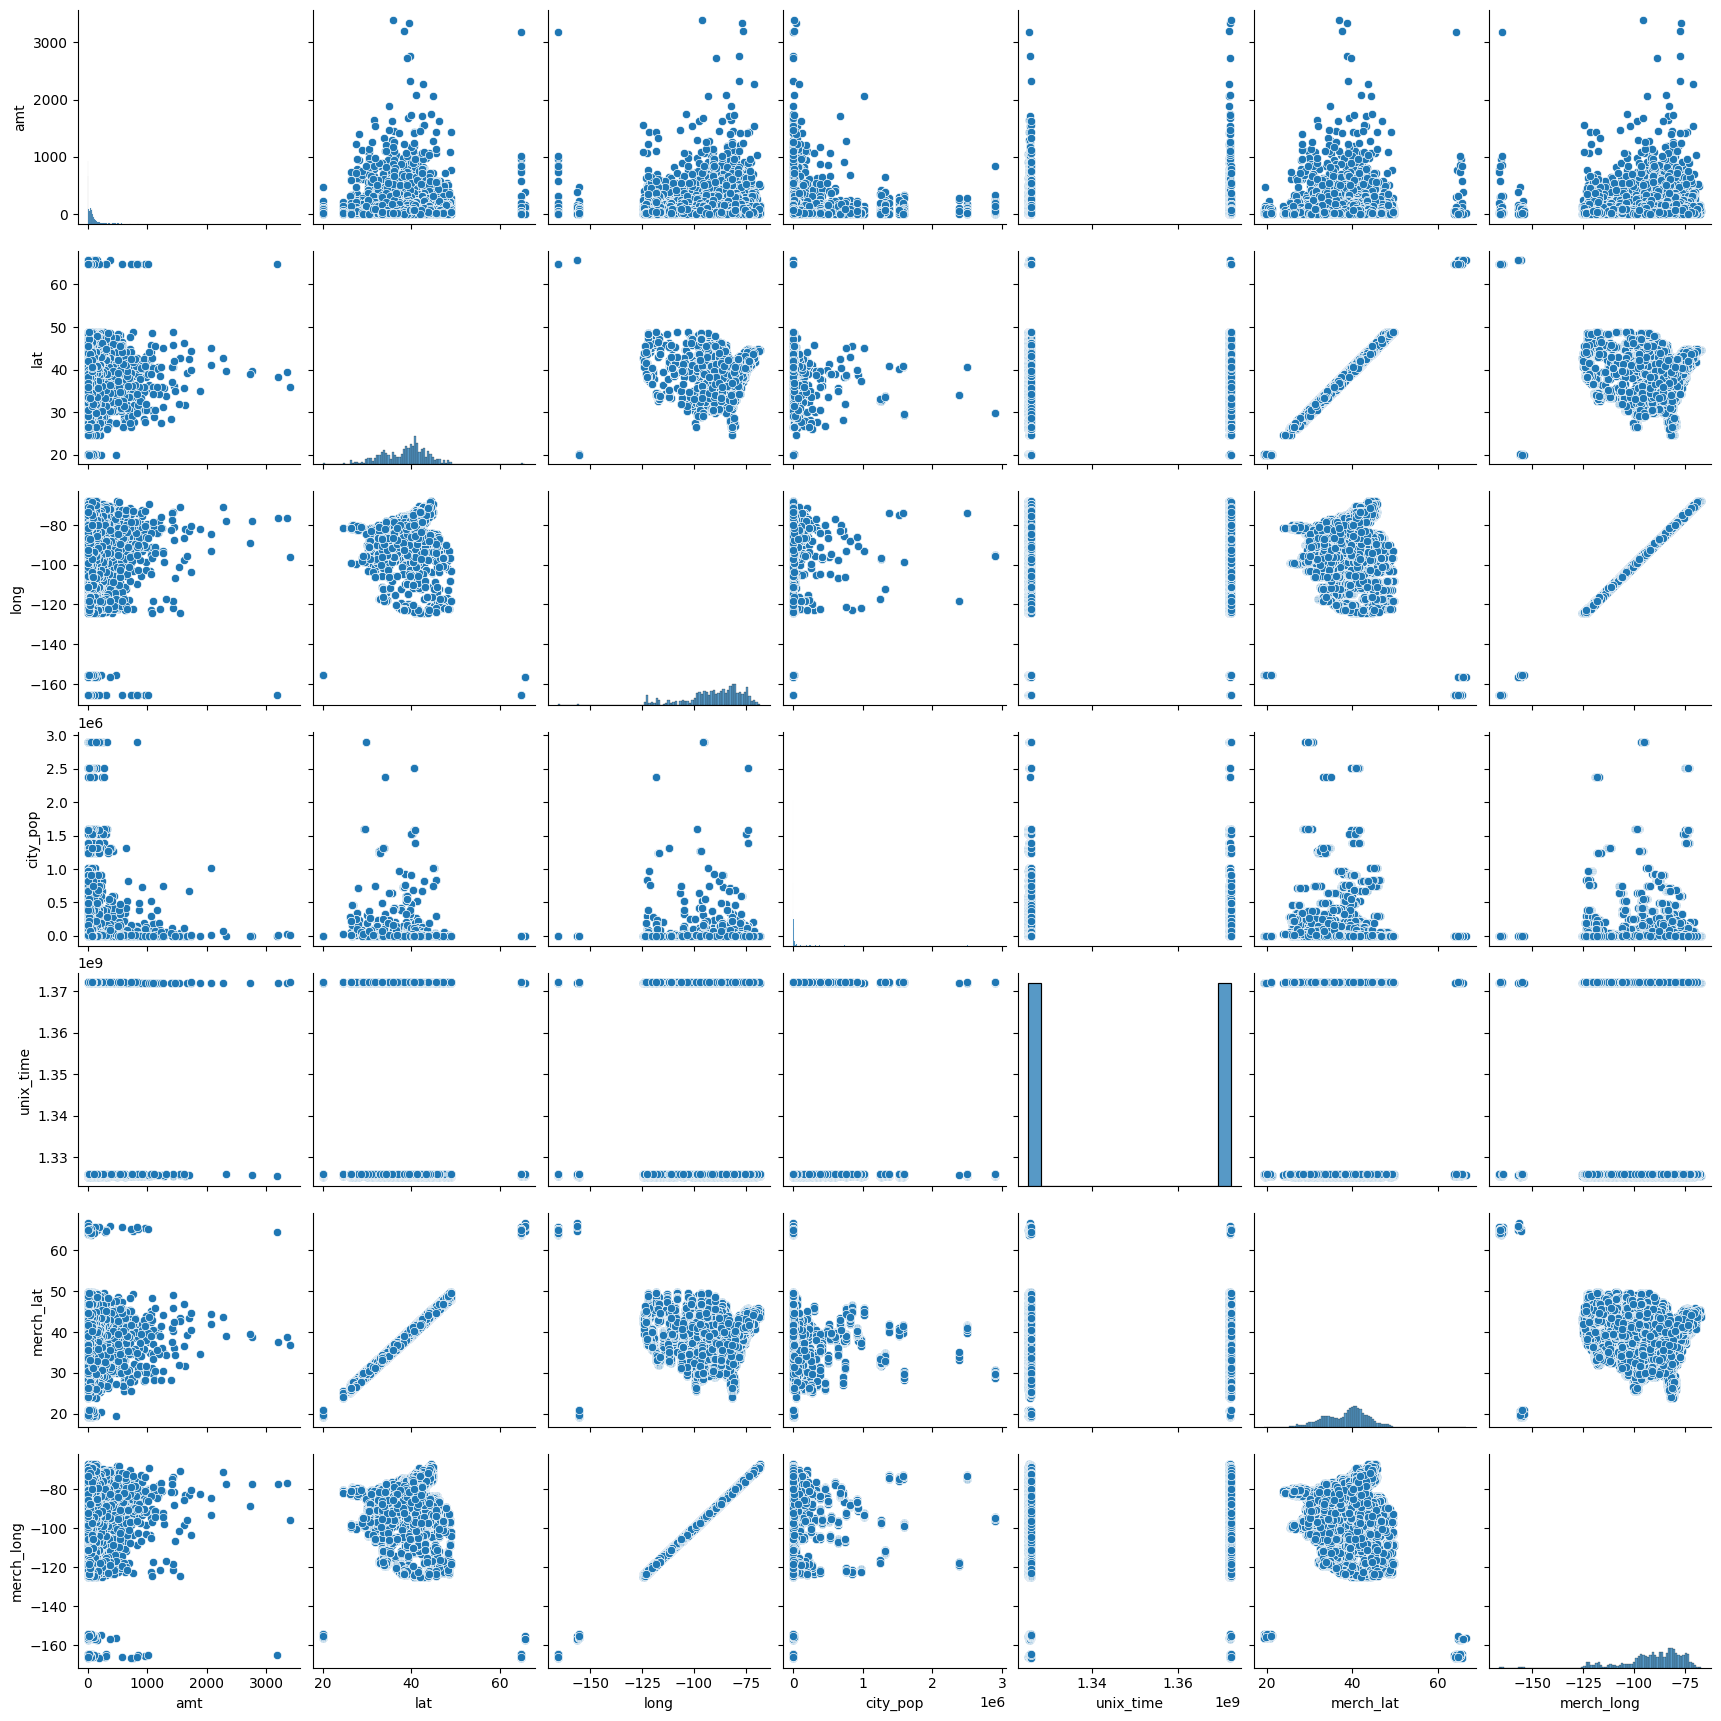

In [12]:
# Visual analysis
# Pairplot for numerical features
sns.pairplot(df[numerical_features])
plt.show()


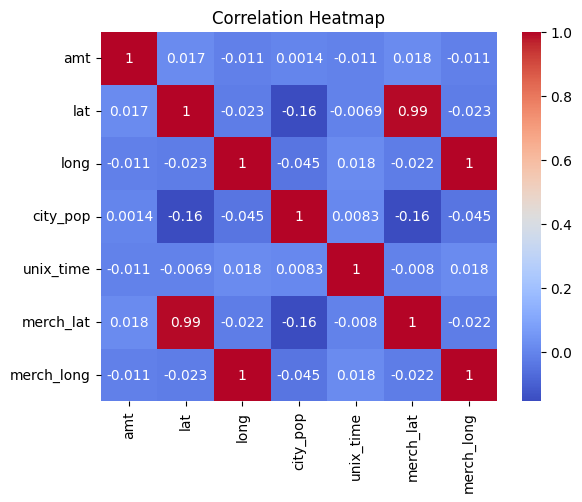

In [13]:
# Correlation heatmap
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

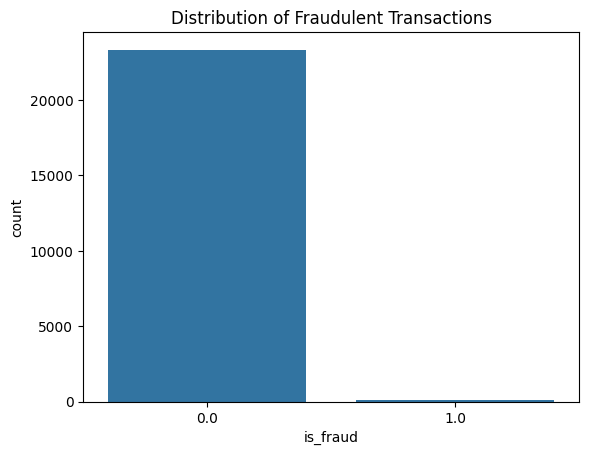

In [14]:
# Distribution of fraudulent transactions
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

In [15]:
# Define features and target variable
X = df[['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']]
y = df['is_fraud']

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


In [19]:
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}, Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()

Model: Logistic Regression, Accuracy: 0.9974364452040162
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4669
         1.0       0.00      0.00      0.00        12

    accuracy                           1.00      4681
   macro avg       0.50      0.50      0.50      4681
weighted avg       0.99      1.00      1.00      4681




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Random Forest, Accuracy: 0.9989318521683401
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4669
         1.0       0.89      0.67      0.76        12

    accuracy                           1.00      4681
   macro avg       0.94      0.83      0.88      4681
weighted avg       1.00      1.00      1.00      4681


Model: Gradient Boosting, Accuracy: 0.9976500747703482
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4669
         1.0       0.56      0.42      0.48        12

    accuracy                           1.00      4681
   macro avg       0.78      0.71      0.74      4681
weighted avg       1.00      1.00      1.00      4681


Model: Support Vector Machine, Accuracy: 0.9974364452040162
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4669


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: K-Nearest Neighbors, Accuracy: 0.9972228156376842
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4669
         1.0       0.33      0.08      0.13        12

    accuracy                           1.00      4681
   macro avg       0.67      0.54      0.57      4681
weighted avg       1.00      1.00      1.00      4681


